# Introduction to Exploratory Data Analysis (EDA) using `pandas` (Tutorial)

This notebook is used as a tutorial version of the `03_intro_to_pandas_eda.ipynb` notebook, which contains the complete version of this notebook. The data for this exercise is borrowed from [here](https://www.kaggle.com/leonardopena/top50spotify2019).

### 1. Read data

In [39]:
import pandas as pd

df = pd.read_csv(r"C:\Users\kylew\OneDrive\Documents\MDA\Spring 2024\Data Mining (DAPT 631)\Data\top50.csv", encoding='latin1')


`pandas.read_csv()` documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

_Python encoding: https://docs.python.org/3/library/codecs.html#standard-encodings_

In [40]:
# view data
print(df)

    Unnamed: 0                                         Track.Name  \
0            1                                           Señorita   
1            2                                              China   
2            3                      boyfriend (with Social House)   
3            4                    Beautiful People (feat. Khalid)   
4            5                        Goodbyes (Feat. Young Thug)   
5            6                  I Don't Care (with Justin Bieber)   
6            7                                             Ransom   
7            8                                  How Do You Sleep?   
8            9                              Old Town Road - Remix   
9           10                                            bad guy   
10          11                                           Callaita   
11          12              Loco Contigo (feat. J. Balvin & Tyga)   
12          13                                  Someone You Loved   
13          14                    

Display some basic information about this data frame.

In [41]:
df.shape

(50, 14)

You can also use `df.dtypes` to view data types for each column.

View column names.

In [42]:
df.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

### Drop a column

In [43]:
df = df.drop(columns=['Unnamed: 0'])
#df.drop(columns=[df.columns[0]])

In [44]:
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


### Modify column names

View column names.

In [45]:
df.columns

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

Convert the column-names array into a string object.

In [46]:
df.columns.str

Example: Convert all column names into uppercase.

In [47]:
df.columns.str.upper()

Index(['TRACK.NAME', 'ARTIST.NAME', 'GENRE', 'BEATS.PER.MINUTE', 'ENERGY',
       'DANCEABILITY', 'LOUDNESS..DB..', 'LIVENESS', 'VALENCE.', 'LENGTH.',
       'ACOUSTICNESS..', 'SPEECHINESS.', 'POPULARITY'],
      dtype='object')

Remove dots from column names.

In [48]:
df.columns.str.replace(".", "")

Index(['TrackName', 'ArtistName', 'Genre', 'BeatsPerMinute', 'Energy',
       'Danceability', 'LoudnessdB', 'Liveness', 'Valence', 'Length',
       'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

Save the results into the data frame.

In [49]:
df.columns = df.columns.str.replace(".", "")
df.head()

,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [50]:
df.describe().T.sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Length,50.0,200.96,39.143879,115.0,176.75,198.0,217.50,309.0
BeatsPerMinute,50.0,120.06,30.898392,85.0,96.00,104.5,137.50,190.0
Popularity,50.0,87.50,4.491489,70.0,86.00,88.0,90.75,95.0
Danceability,50.0,71.38,11.929880,29.0,67.00,73.5,79.75,90.0
Energy,50.0,64.06,14.231913,32.0,55.25,66.5,74.75,88.0
Valence,50.0,54.60,22.336024,10.0,38.25,55.5,69.50,95.0
Acousticness,50.0,22.16,18.995553,1.0,8.25,15.0,33.75,75.0
Liveness,50.0,14.66,11.118306,5.0,8.00,11.0,15.75,58.0
Speechiness,50.0,12.48,11.161596,3.0,5.00,7.0,15.00,46.0
LoudnessdB,50.0,-5.66,2.056448,-11.0,-6.75,-6.0,-4.00,-2.0


### Correlations

In [51]:
numeric_cols = df.columns[3:]
numeric_cols

Index(['BeatsPerMinute', 'Energy', 'Danceability', 'LoudnessdB', 'Liveness',
       'Valence', 'Length', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [52]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df

,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,117,55,76,-6,8,75,191,4,3,79
1,105,81,79,-4,8,61,302,8,9,92
2,190,80,40,-4,16,70,186,12,46,85
3,93,65,64,-8,8,55,198,12,19,86
4,150,65,58,-4,11,18,175,45,7,94
5,102,68,80,-5,9,84,220,9,4,84
6,180,64,75,-6,7,23,131,2,29,92
7,111,68,48,-5,8,35,202,15,9,90
8,136,62,88,-6,11,64,157,5,10,87
9,135,43,70,-11,10,56,194,33,38,95


In [53]:
corr = numeric_df.corr()

In [54]:
corr = df.corr(numeric_only=True) #Much easier approach

Plot the correlation matrix.

In [55]:
# import necessary packages
import matplotlib.pyplot as plt
import seaborn as sns

# if needed, enable inline plots
#plt.ion()

_The `ion()` function causes the output of plotting commands to be displayed inline within frontends (like the Jupyter notebook), directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document. More details here: https://ipython.readthedocs.io/en/stable/interactive/plotting.html_

<Axes: >

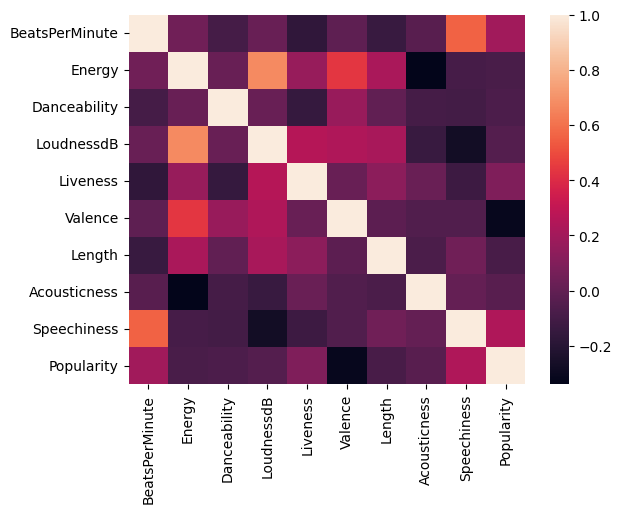

In [56]:
# create a heat map
sns.heatmap(corr)

Increase the figure size.

In [57]:
# set figure size

# create a heat map


Change the color palette.

In [58]:
# define a color palette

# if needed, adjust the truncated top and bottom rows
#ax.set_ylim(len(corr_matrix), 0)

_Note: Depending on the version of `matplotlib` on your computer, some of you may see truncated top and bottom rows. This is a known bug; see https://github.com/matplotlib/matplotlib/issues/14751_

### Distributions

View summary statistics.

In [59]:
df.describe()

,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


_`pandas.DataFrame.describe` documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html_

Transpose the summary statistics for better visibility.

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BeatsPerMinute,50.0,120.06,30.898392,85.0,96.00,104.5,137.50,190.0
Energy,50.0,64.06,14.231913,32.0,55.25,66.5,74.75,88.0
Danceability,50.0,71.38,11.929880,29.0,67.00,73.5,79.75,90.0
LoudnessdB,50.0,-5.66,2.056448,-11.0,-6.75,-6.0,-4.00,-2.0
Liveness,50.0,14.66,11.118306,5.0,8.00,11.0,15.75,58.0
Valence,50.0,54.60,22.336024,10.0,38.25,55.5,69.50,95.0
Length,50.0,200.96,39.143879,115.0,176.75,198.0,217.50,309.0
Acousticness,50.0,22.16,18.995553,1.0,8.25,15.0,33.75,75.0
Speechiness,50.0,12.48,11.161596,3.0,5.00,7.0,15.00,46.0
Popularity,50.0,87.50,4.491489,70.0,86.00,88.0,90.75,95.0


Export the summary statistics.

In [61]:
df.describe().T.to_csv(r"C:\Users\kylew\OneDrive\Documents\MDA\Spring 2024\Data Mining (DAPT 631)\Data\descr_stats.csv")

### Histograms

Plot a histogram for one variable.

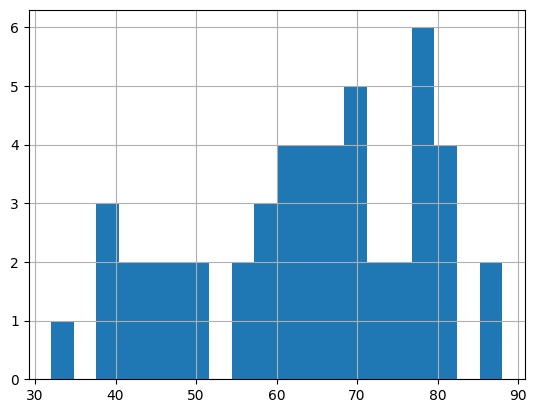

In [62]:
df['Energy'].hist(bins=20);

_`pandas.DataFrame.hist` documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html_

Plot histograms for multiple variables.

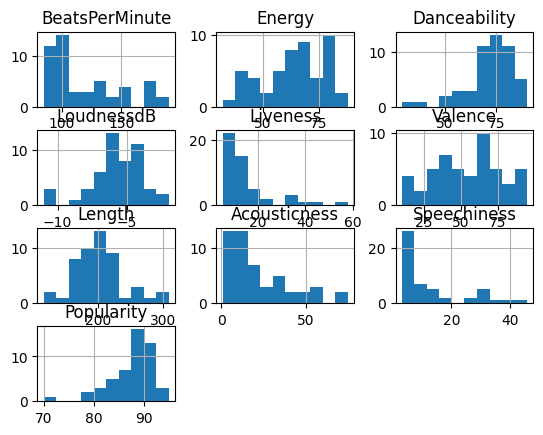

In [63]:
df.hist();

Change the bin size.

#### Format plots.

Define 10 subplots and arrange them into 5 rows and 2 columns.

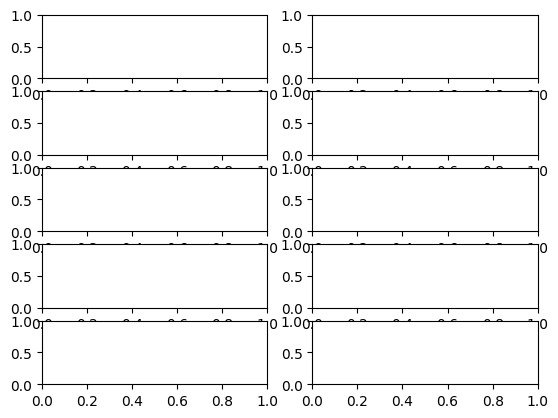

In [64]:
fig, axes = plt.subplots(nrows=5, ncols=2)

View the axes component.

In [65]:
axes

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

Iterate through the axes.

In [66]:
for axis in axes:
    print(axis)

[<Axes: > <Axes: >]
[<Axes: > <Axes: >]
[<Axes: > <Axes: >]
[<Axes: > <Axes: >]
[<Axes: > <Axes: >]


Iterate thru the column names in the data frame.

In [67]:
for i, col in enumerate(df.columns[3:]):
    print(i, col)

0 BeatsPerMinute
1 Energy
2 Danceability
3 LoudnessdB
4 Liveness
5 Valence
6 Length
7 Acousticness
8 Speechiness
9 Popularity


Isolate numeric columns.

In [68]:
num_cols = df.columns[3:]
len(num_cols)

10

A better way to isolate numeric columns is by using `df.dtypes`.

In [69]:
axes.flat #flattens array into single line of 10 elements

BeatsPerMinute
Energy
Danceability
LoudnessdB
Liveness
Valence
Length
Acousticness
Speechiness
Popularity


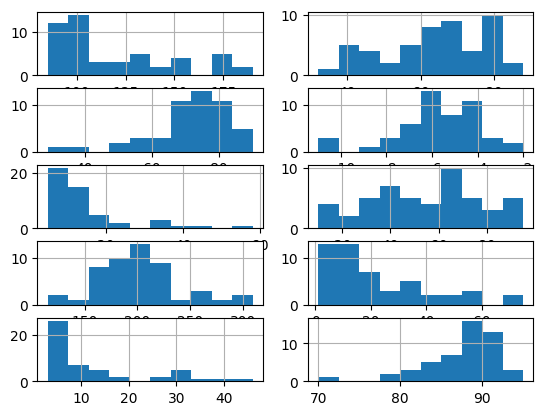

In [70]:
fig, axes = plt.subplots(nrows=5, ncols=2)

for i, axis in enumerate(axes.flat):
    col = num_cols[i]
    print(col)
    df[col].hist(ax=axis);

Check How many numeric columns we have.

Plot historgams for all numeric columns.

Increase the subplot figure sizes, improve the plot layout, and remove gridlines.

Use a color palette.

_Seabron Documentation on 'Choosing color palettes': https://seaborn.pydata.org/tutorial/color_palettes.html_

Apply this color palette to the histograms, and export the plot.

### Violin/Box plots

The default violin plot.

Check the distribution of `Genre`.

In [71]:
df['Genre'].value_counts()

Genre
dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
reggaeton           2
reggaeton flow      2
panamanian pop      2
canadian pop        2
electropop          2
country rap         2
dfw rap             2
brostep             2
trap music          1
escape room         1
pop house           1
australian pop      1
atl hip hop         1
big room            1
boy band            1
r&b en espanol      1
Name: count, dtype: int64

<Axes: xlabel='Genre', ylabel='Energy'>

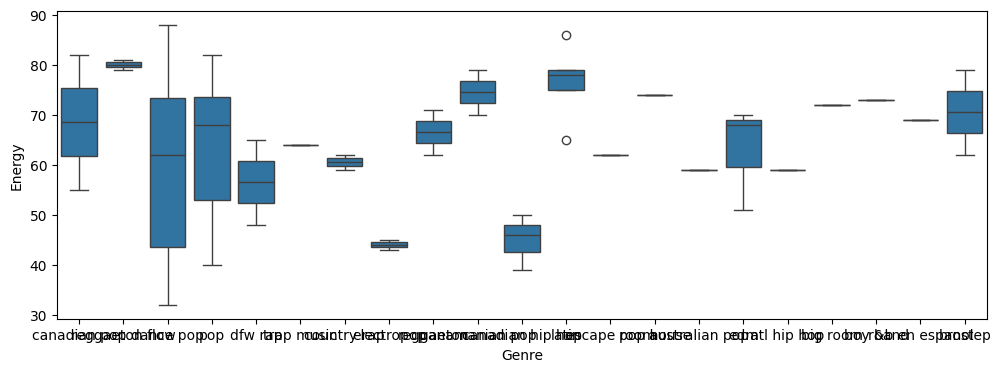

In [72]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='Genre', y='Energy', data=df)

Combine similar generes to reduce cardinality.

In [73]:
import numpy as np

df['GenreGrouped'] = np.where(df.Genre.str.contains('pop'), 'POP',
                              np.where(df.Genre.str.contains('hip hop'), 'HIP HOP',
                              np.where(df.Genre.str.contains('rap'), 'RAP',
                              'OTHER')))

View data to ensure the mapping was done correctly.

In [74]:
df.GenreGrouped.value_counts()

GenreGrouped
POP        23
OTHER      18
RAP         5
HIP HOP     4
Name: count, dtype: int64

Plot the new genere column created above.

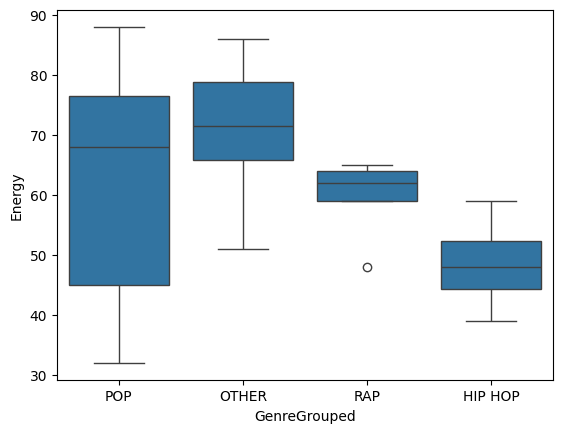

In [75]:
sns.boxplot(x='GenreGrouped', y='Energy', data=df);

Box plot.

Add axes labels.

Change plot layout to add gridlines.

### Scatter plot

Plot loudness versus energy.

In [ ]:
plt.figure()

sns.scatterplot(x='LoudnessdB', y='Energy', data=df);

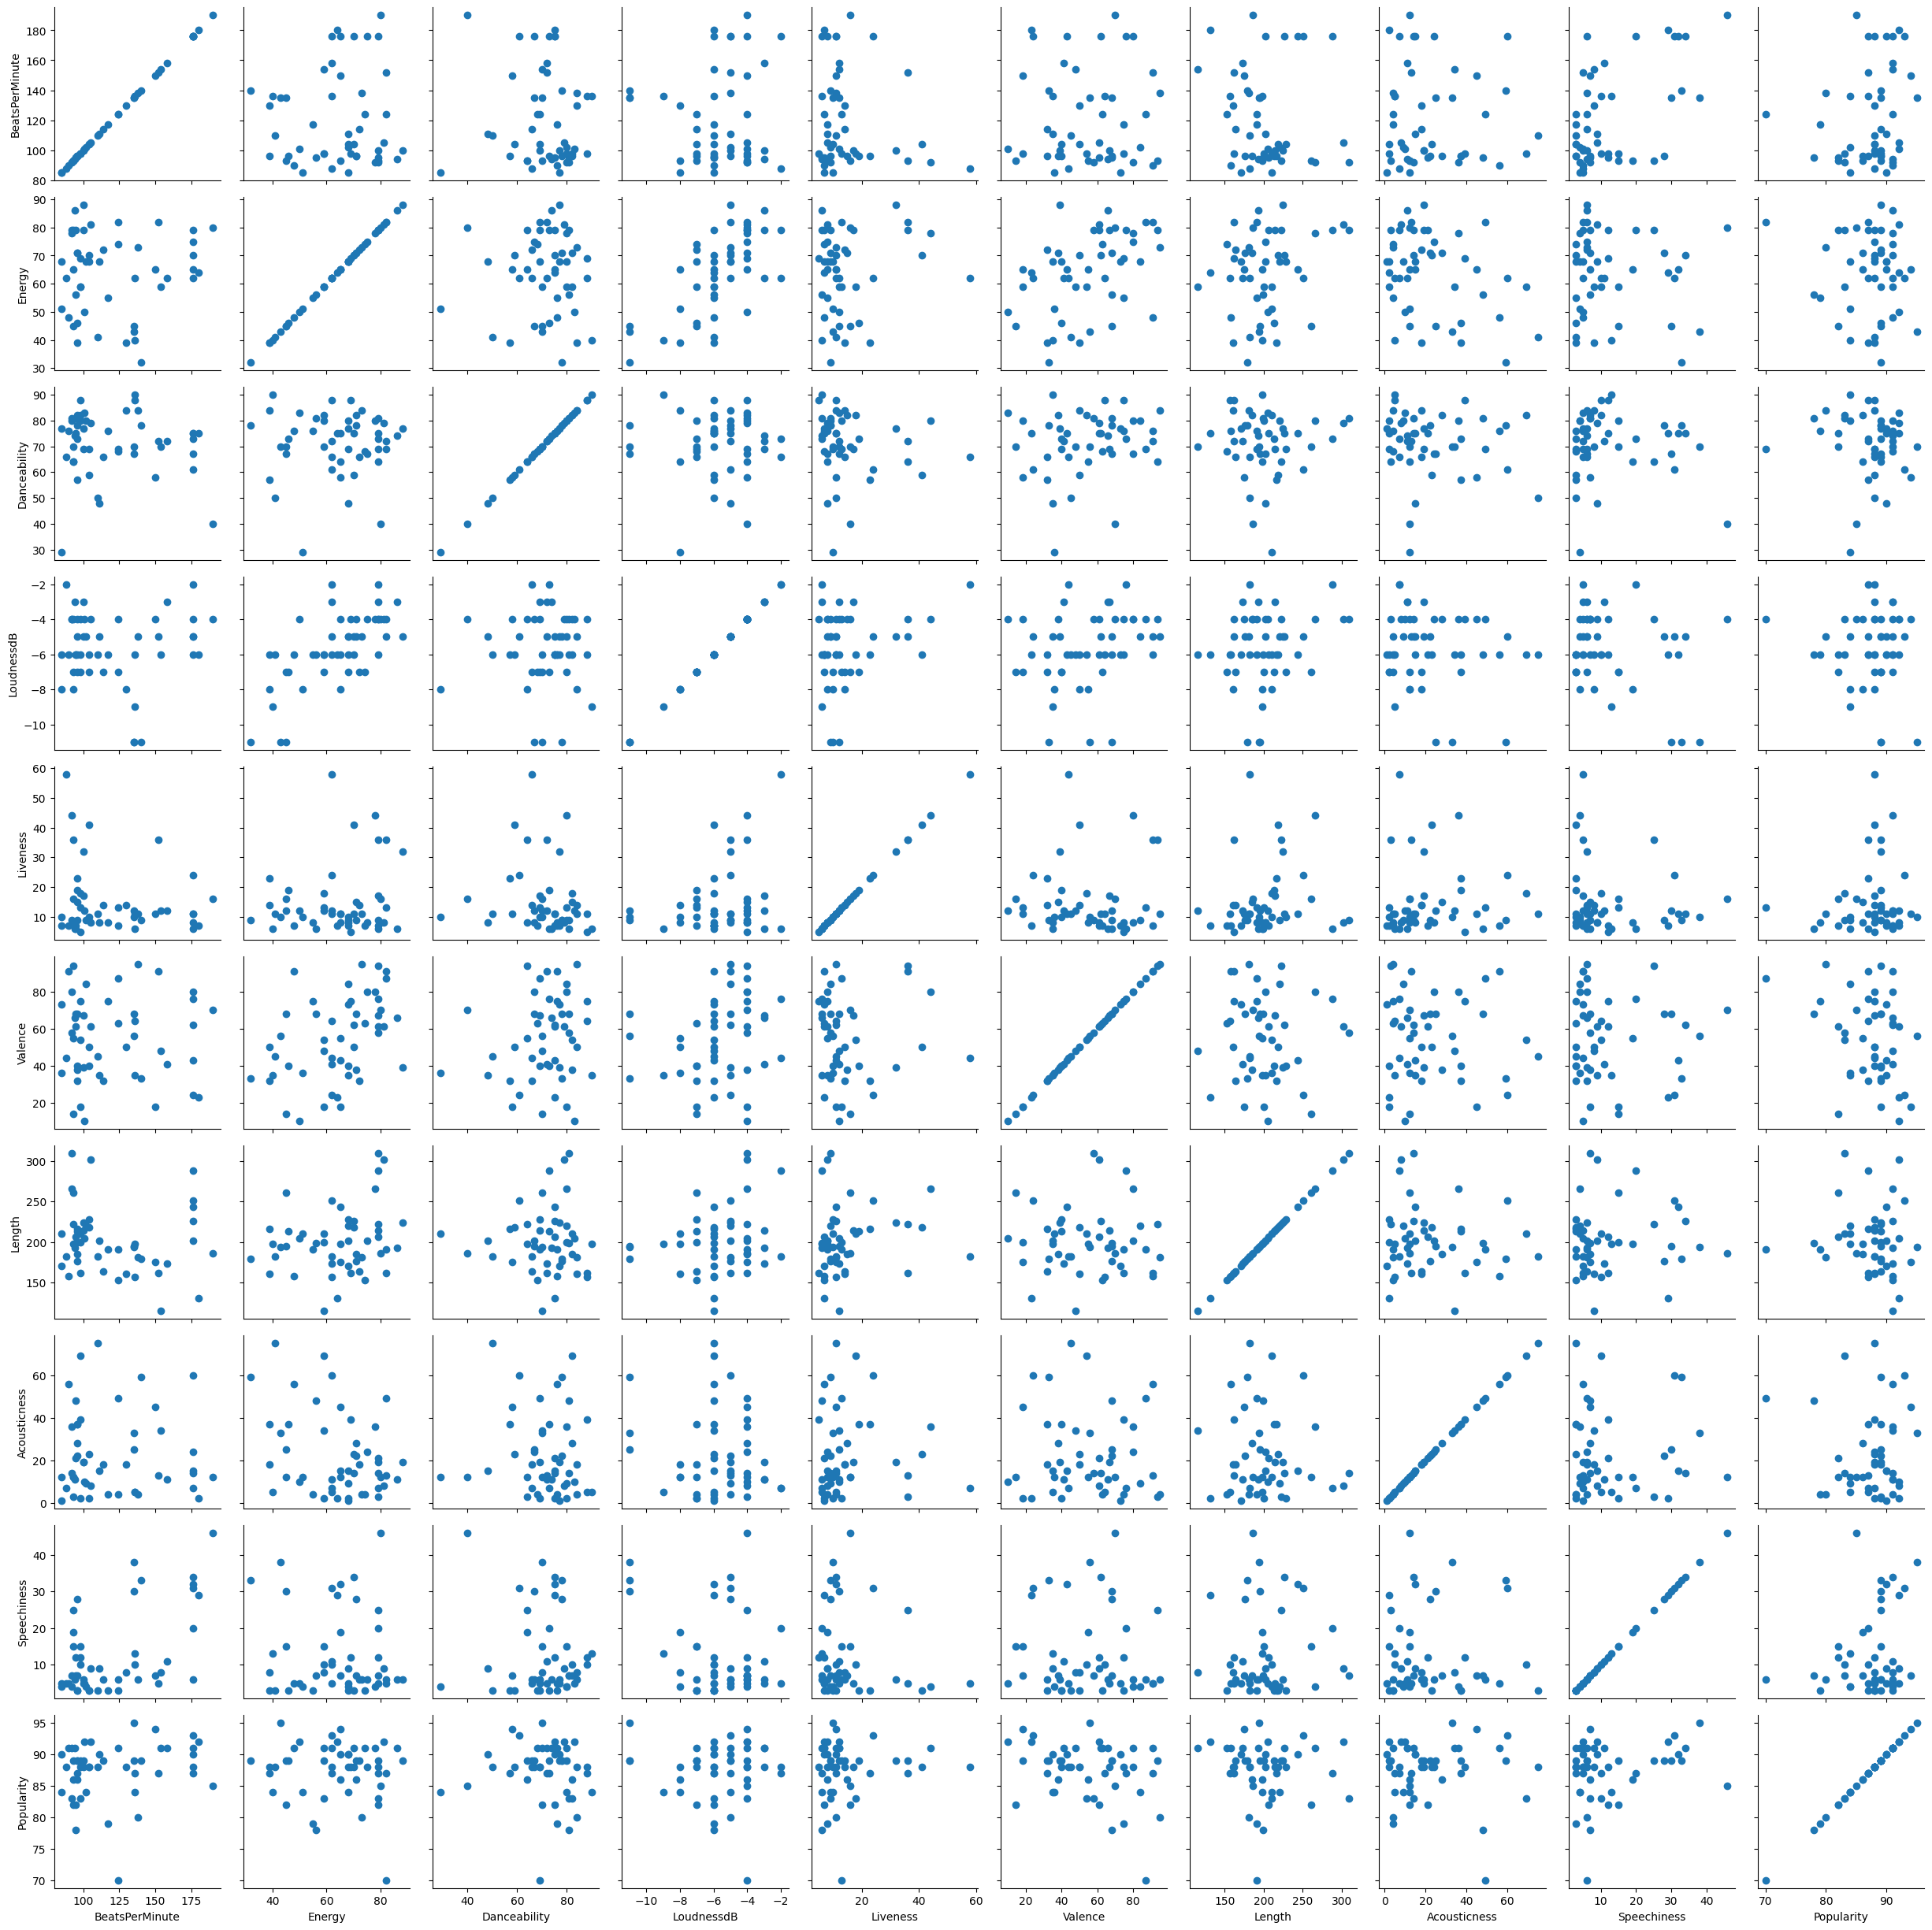

In [38]:
g = sns.PairGrid(df)
g.map(plt.scatter)

Label data points based on genre.

### Data Aggregation

How many total artists are there in this dataset?

Frequency of occurence for each artist.

Let's analyze (the average) popularity by genere.

You can also calculate the % distribution by dividing each count by the total number of records in the data frame.

Use `pandas` `groupby()` function to create an object.

View the size of each category of `Genre2`.

Create a series by adding an attribute (column).

Now you can run functions, such as `mean()`, `max()` etc, on the series.

Save the results.

Create a two-axis plot to view the genre size and average popularity.

Sort values from larger to smaller genre.

### Join (combine) data

Before we can join these two `pd.Series`, we must conver one of them into `pd.DataFrame` objects.

See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html

Reset (flatten) the multi-level column names.

Let's save the results into a data frame.

Rename a column in this data frame.

Plot the results with genre sorted from large to small.

### Plotting pairwise data relationships using `seaborn`